In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings

In [2]:
df=pd.read_csv("city_day.csv")

In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
value_cols=["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","AQI"]
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
df[value_cols]=imputer.fit_transform(df[value_cols])


In [8]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [9]:
c_imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["AQI_Bucket"]=c_imputer.fit_transform(df[["AQI_Bucket"]])

In [14]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
city_data=df[df["City"]=="Delhi"]

In [17]:
df.groupby("City").median()

C:\Users\RAJ\AppData\Local\Temp\ipykernel_22804\2080783565.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("City").median()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,,,,,,,,,,,,,
Ahmedabad,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,8.510,23.810000,34.49143,3.28084,11.320000,3.070128,229.000000
Aizawl,11.790000,19.020000,11.53000,0.260000,15.460000,22.710000,0.260,7.360000,2.82000,3.28084,6.950000,3.070128,24.000000
Amaravati,30.580000,68.720000,3.48000,16.170000,11.620000,11.880000,0.620,13.620000,34.49143,0.15000,1.100000,0.160000,86.000000
Amritsar,48.200000,101.560000,15.96000,14.040000,32.309123,11.870000,0.620,7.070000,22.40000,3.28084,2.220000,4.660000,107.000000
Bengaluru,32.590000,88.440000,7.54000,26.950000,19.150000,21.540000,0.930,5.040000,32.60000,0.95000,1.860000,3.070128,88.000000
Bhopal,45.670000,118.127103,5.38000,31.800000,23.310000,17.490000,0.880,12.270000,59.06000,3.28084,8.700972,3.070128,120.000000
Brajrajnagar,67.450578,118.127103,17.57473,19.915000,26.665000,23.483476,2.140,12.535000,15.66000,0.24000,8.700972,3.070128,156.000000
Chandigarh,35.200000,78.935000,7.12000,11.315000,10.970000,30.430000,0.600,9.985000,16.38500,4.34000,0.500000,1.020000,83.000000
Chennai,47.560000,118.127103,8.07000,15.570000,16.770000,34.320000,0.860,6.610000,30.92000,0.31000,1.350000,3.070128,104.000000


In [18]:
def pl(pollutant):
    df_grouped=df.groupby("City")[pollutant].median()
    sorted_cities_asc=df_grouped.sort_values().index
    sorted_cities_dsc=df_grouped.sort_values(ascending=False).index
    fig,axs=plt.subplots(2,1,figsize=(12,6))
    axs[0].bar(sorted_cities_asc,df_grouped[sorted_cities_asc])
    axs[0].set_xticklabels(df_grouped.sort_values().index,rotation=90)
    axs[1].bar(sorted_cities_dsc,df_grouped[sorted_cities_dsc])
    axs[1].set_xticklabels(df_grouped.sort_values(ascending=False).index,rotation=90)
    plt.tight_layout()
    

C:\Users\RAJ\AppData\Local\Temp\ipykernel_22804\1850969597.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(df_grouped.sort_values().index,rotation=90)
C:\Users\RAJ\AppData\Local\Temp\ipykernel_22804\1850969597.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_grouped.sort_values(ascending=False).index,rotation=90)


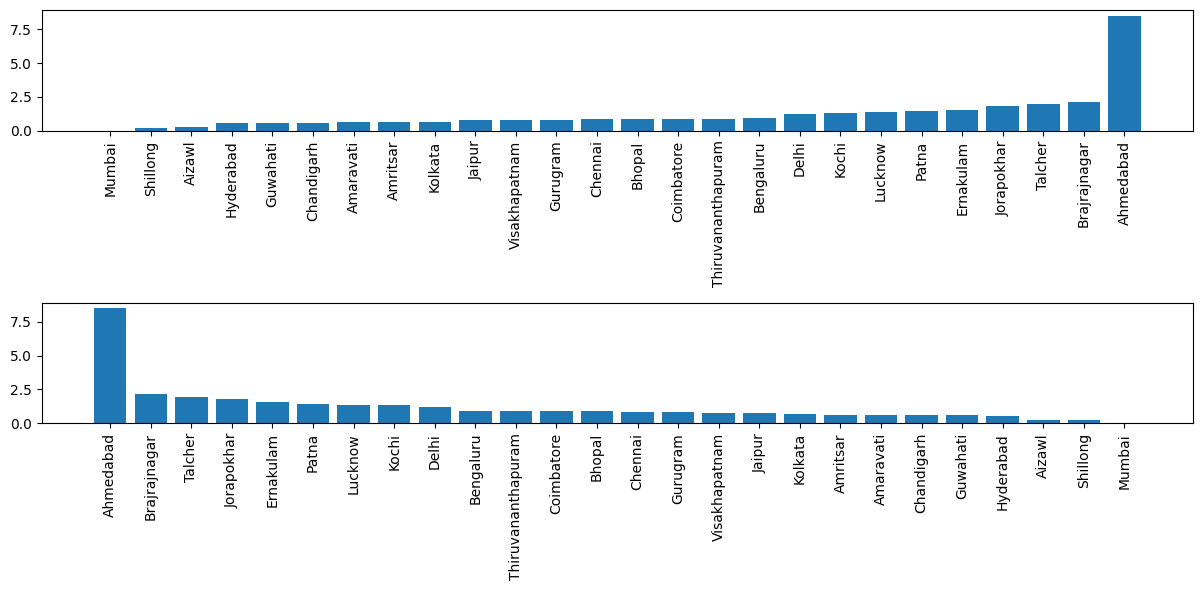

In [19]:
pl("CO")

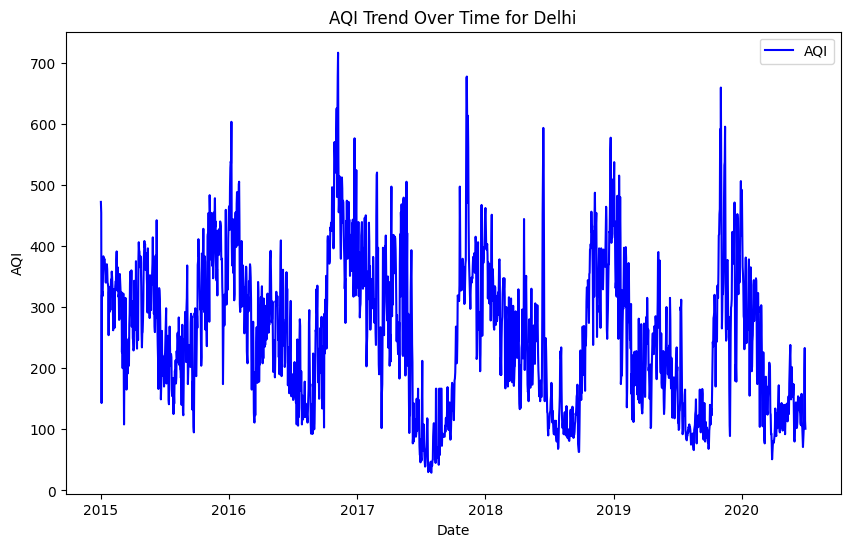

In [20]:
# Plot AQI trend
plt.figure(figsize=(10, 6))
plt.plot(city_data['Date'], city_data['AQI'], color='blue', label='AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trend Over Time for Delhi')
plt.legend()
plt.show()


<Axes: xlabel='AQI_Bucket', ylabel='AQI'>

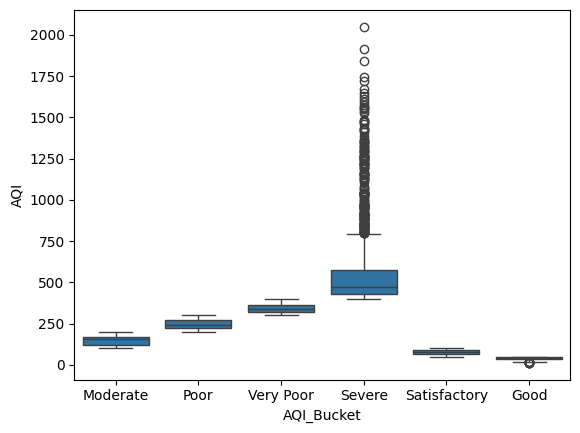

In [21]:
#Box Plot
sns.boxplot(df,y="AQI",x="AQI_Bucket")

In [22]:
def sct(pollutant):
    sns.scatterplot(df,x=pollutant,y="AQI")

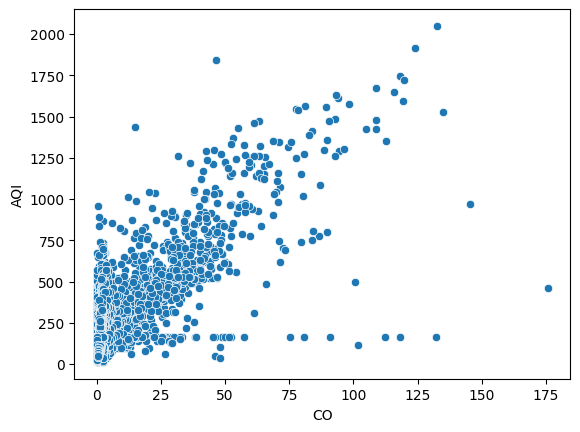

In [23]:
sct("CO")